## Classification with Scikit Learn (Trees & Forests) - Part 1

### Data Analysis with Python, Pandas, Seaborn & Skicit-Learn 
- Data import 
- Data exploration / visualization 
- Data cleaning 
- Prepare Data for Decision Trees & Random Forests ( Pipelines :-) )
- Train algorithmns (What's the gist of Decision Trees & Random Forests?) 
- Evaluate algorithms 
- Tune algorithmns ( Grid Search :-) )

**Example data: Telemarketing**  
Source adapted from 
https://data.world/uci/bank-marketing/workspace/file?filename=bank-additional%2Fbank-additional-names.txt

### 1. Load into pd.DataFrame

In [1]:
import pandas as pd 

df = pd.read_csv("data/bank_data_new.csv")
print(len(df))
df.head()

39673


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,no


In [2]:
import numpy as np

df.replace("unknown", np.nan, inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,no


#### OVERVIEW OF THE COLUMNS:

**Client Data** 
- 1 - age (numeric)
- 2 - job : type of job
- 3 - marital : marital status 
(categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
- 4 - education (categorical: "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", "university.degree", "unknown")
- 5 - default: has credit in default? (categorical: "no","yes","unknown")
- 6 - housing: has housing loan? (categorical: "no","yes","unknown")
- 7 - loan: has personal loan? (categorical: "no","yes","unknown")
    
**Campaign Data**
- 8 - contact: contact communication type (categorical: "cellular","telephone") 
- 9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- 10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

**Output variable (desired target)**:
- 11 - has the client subscribed a term deposit? (binary: "yes","no")

--> *This binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).*

### 2. First Exploration & Data Cleaning   

In [3]:
#Target
df["y"].value_counts()

no     36000
yes     3673
Name: y, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7c2ec5c1d0f0>]],
      dtype=object)

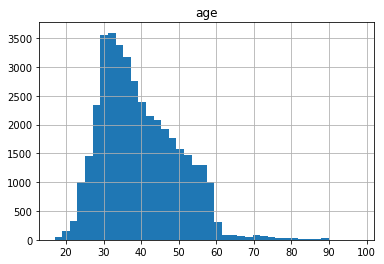

In [4]:
#Age
import matplotlib.pyplot as plt 
%matplotlib inline 

df.hist("age", bins = 40)

In [5]:
#Value Counts Check
df["default"].value_counts(dropna=False)

no     31137
NaN     8533
yes        3
Name: default, dtype: int64

**Would be very interesting to know, what the ~8500 NaN represent! Keep it?**

In [6]:
#Kick out default 
df["default"] = df["default"].fillna("unknown")
df = df[df["default"] != "yes"]
df["default"].value_counts(dropna=False)

no         31137
unknown     8533
Name: default, dtype: int64

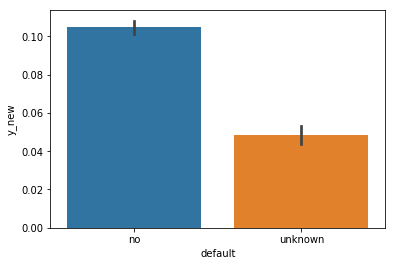

In [7]:
from sklearn import preprocessing
import seaborn as sns 

lb = preprocessing.LabelBinarizer()
df["y_new"] = lb.fit_transform(df["y"])

sns.barplot(x="default", y="y_new", data=df)

**-> Make this check with every variable!**

In [8]:
#Convert Month & Day to Integers 
d1 = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11,'dec':12}
d2 = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}

df["month"] = df["month"].map(d1)
df["day_of_week"] = df["day_of_week"].map(d2)
df.month.head()

0    5
1    5
2    5
3    5
4    5
Name: month, dtype: int64

In [9]:
#Convert educational to ordinal scale (0-6)
d3 = {"illiterate": 0, 
      "basic.4y": 1, 
      "basic.6y": 2, 
      "basic.9y": 3, 
      "high.school": 4, 
      "professional.course": 5, 
      "university.degree": 6} 

df["education"] = df["education"].map(d3)
df["education"].head()

0    1.0
1    4.0
2    4.0
3    2.0
4    4.0
Name: education, dtype: float64

### 3. Dropping NaN

In [10]:
#Nulls 
for col in df.columns: 
    print("{}:".format(col), df[col].isnull().sum())

age: 0
job: 310
marital: 75
education: 1633
default: 0
housing: 956
loan: 956
contact: 0
month: 0
day_of_week: 0
y: 0
y_new: 0


In [11]:
df.dropna(inplace=True)
print(len(df))

36876


### 4. Create Train/Test Set 

*Avoid Data Snooping Bias!*

In [12]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-2]
y = df["y_new"]

X, X_test, y, y_test = train_test_split(X, y, random_state=42)
print(len(X))
X.head()

27657


,age,job,marital,education,default,housing,loan,contact,month,day_of_week
15644,48,services,divorced,4.0,no,no,yes,telephone,7,1
17741,50,services,married,4.0,no,no,no,cellular,7,2
6706,42,admin.,single,6.0,no,no,no,telephone,5,3
5284,32,self-employed,married,3.0,no,no,no,telephone,5,5
4257,37,admin.,married,4.0,unknown,yes,yes,telephone,5,2


In [13]:
print(len(y))
y.head()

27657


15644    0
17741    0
6706     0
5284     0
4257     0
Name: y_new, dtype: int64

### 5. Exploration & Feature Engineering abbreviated

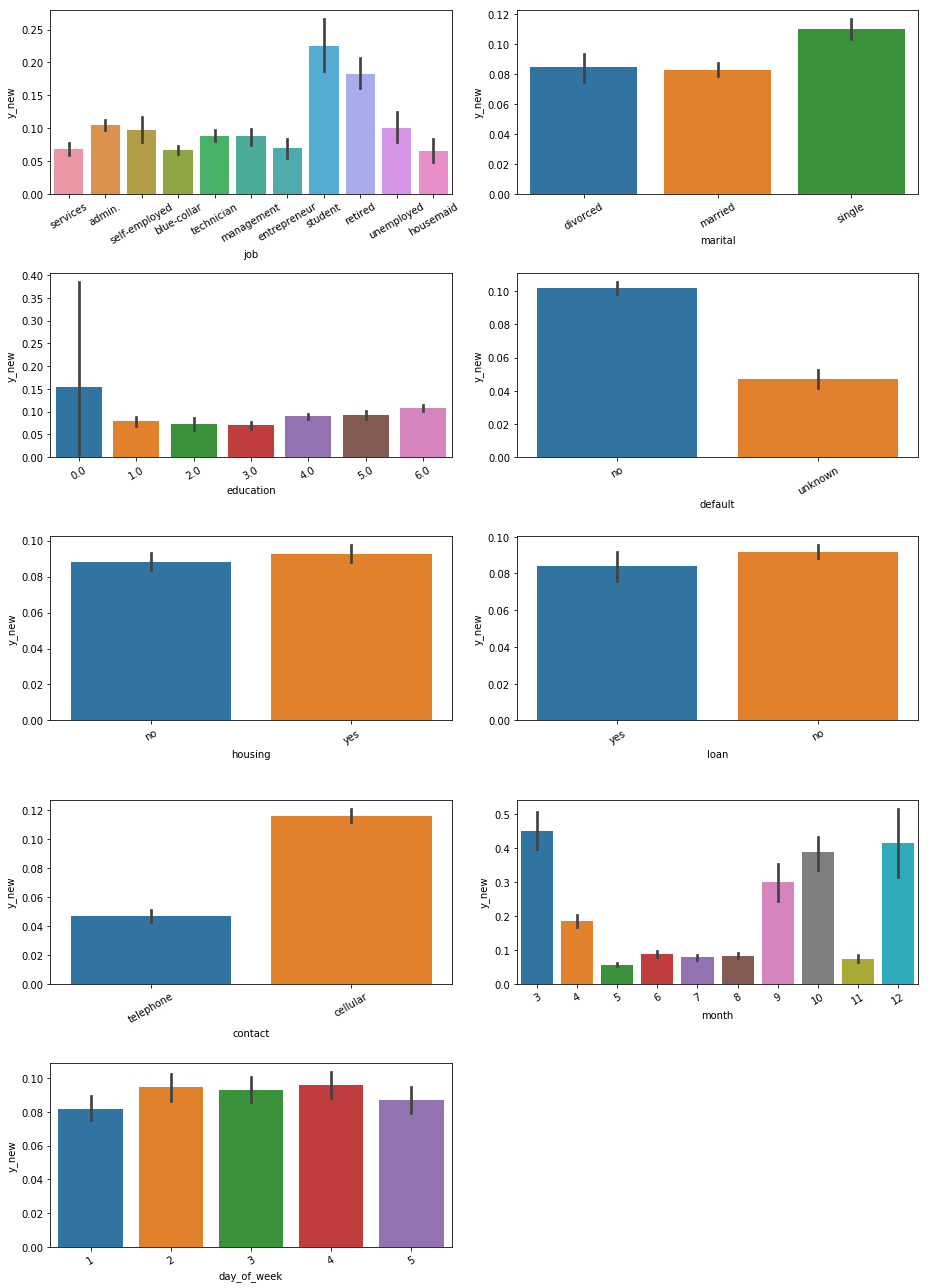

In [14]:
#Visualization
import seaborn as sns 

plt.figure(figsize=(13,18))
for i,col in enumerate(df.columns[1:-2]):
    plt.subplot(5,2,i+1)
    sns.barplot(x=X[col], y=y)
    plt.xticks(rotation=30)
plt.tight_layout()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75]),
 <a list of 76 Text xticklabel objects>)

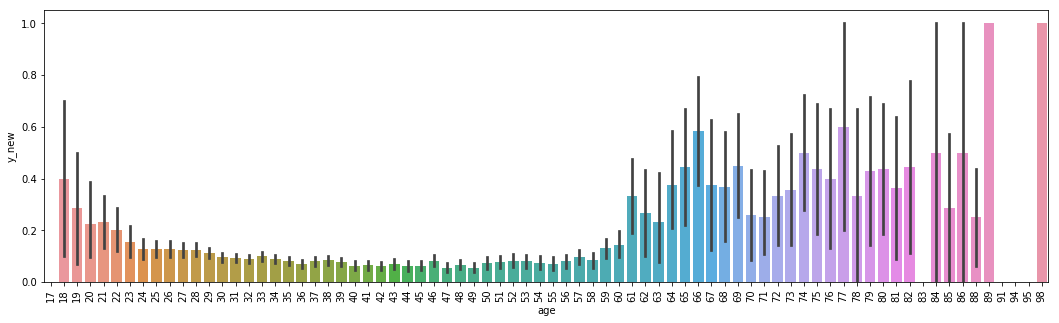

In [15]:
#Age 
plt.figure(figsize=(18,5))
sns.barplot(x=X["age"], y=y)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

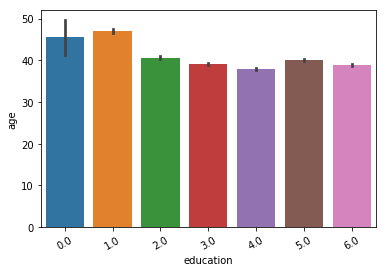

In [16]:
sns.barplot("education", "age", data=X)
plt.xticks(rotation=30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

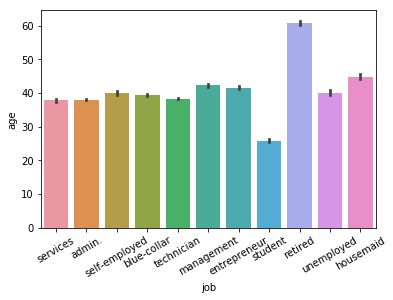

In [17]:
sns.barplot("job", "age", data=X)
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

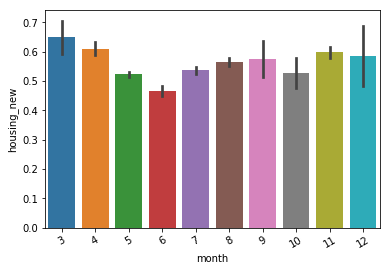

In [18]:
X["loan_new"] = lb.fit_transform(X["loan"])
X["housing_new"] = lb.fit_transform(X["housing"])

sns.barplot("month", "housing_new", data=X)
plt.xticks(rotation=30)

### 6. Create a Pipeline for Decision Trees 

In [19]:
#Creating Custom Pipeline for Decision Tree & Random Forest
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer
from sklearn_pandas import DataFrameMapper
from sklearn.pipeline import Pipeline, FeatureUnion

cat_unchanged = ["age", "education", "month", "day_of_week"]
cat_1hot = ["job", "marital"]
cat_binary = ["default", "housing", "loan", "contact"]

#Pipeline 1
mapper1 = DataFrameMapper(
    [(d, LabelEncoder()) for d in cat_1hot]
)

onehot_pipe = Pipeline([
    ("mapper", mapper1),
    ("onehot", OneHotEncoder(sparse=False))
])

#Pipeline 2 (Binary + Features Unchanged)
mapper2 = DataFrameMapper(
    [(d, None) for d in cat_unchanged] +
    [(d, LabelBinarizer()) for d in cat_binary]
)

binary_pipe = Pipeline([
    ("mapper", mapper2)
])

#Full Pipeline
full_pipeline = FeatureUnion(transformer_list=[
        ("binary_pipe", binary_pipe),
        ("onehot_pipe", onehot_pipe)
    ])

X_prepared = full_pipeline.fit_transform(X)
X_prepared[:10]

array([[48.,  4.,  7.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.],
       [50.,  4.,  7.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.],
       [42.,  6.,  5.,  3.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [32.,  3.,  5.,  5.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [37.,  4.,  5.,  2.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [38.,  4.,  5.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [29.,  4.,  5.,  3.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.],
       [27.,  1.,  5.,  3.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 

In [20]:
#Make Training DF
cols = [cat_unchanged 
        +cat_binary[:-1] +["telephone"]
        +["job_" + l for l in list(np.sort(df["job"].unique()))] 
        +["divorced", "married", "single"] 
       ]

X_final = pd.DataFrame(X_prepared, columns=cols)
X_final.tail(10)

,age,education,month,day_of_week,default,housing,loan,telephone,job_admin.,job_blue-collar,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,divorced,married,single
27647,38.0,2.0,5.0,3.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27648,43.0,6.0,5.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
27649,38.0,3.0,5.0,5.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27650,37.0,6.0,7.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27651,50.0,3.0,8.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27652,58.0,1.0,7.0,4.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27653,49.0,4.0,5.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
27654,41.0,1.0,7.0,5.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27655,34.0,2.0,5.0,3.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27656,58.0,5.0,7.0,5.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
#Make Testing DF
X_test_prepared = full_pipeline.fit_transform(X_test)
X_test_prepared = pd.DataFrame(X_test_prepared, columns=cols)
X_test_prepared.head()

,age,education,month,day_of_week,default,housing,loan,telephone,job_admin.,job_blue-collar,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,divorced,married,single
0,58.0,1.0,8.0,5.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,54.0,2.0,11.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,44.0,6.0,6.0,4.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,47.0,3.0,5.0,4.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,43.0,6.0,7.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 7. Decision Trees

In [22]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydot
from IPython.display import Image

criteria = ["gini", "entropy"]

for c in criteria: 
    tree_clf = DecisionTreeClassifier(criterion=c, random_state=39)
    tree_clf.fit(X_final,y)
    y_pred_tree = tree_clf.predict(X_test_prepared)
    score = tree_clf.score(X_test_prepared, y_test)
    print("Score: {} = {}".format(c,score))
    
    export_graphviz(
        tree_clf,
        out_file = "output/tree.dot",
        feature_names = cols[0],
        class_names = ["No", "Yes"],
        max_depth = 5,
        filled=True)
    
    (graph,) = pydot.graph_from_dot_file('output/tree.dot')
    png = 'output/tree_{}.png'.format(c)
    graph.write_png(png) 

Score: gini = 0.8503091441588024
Score: entropy = 0.8496583143507973


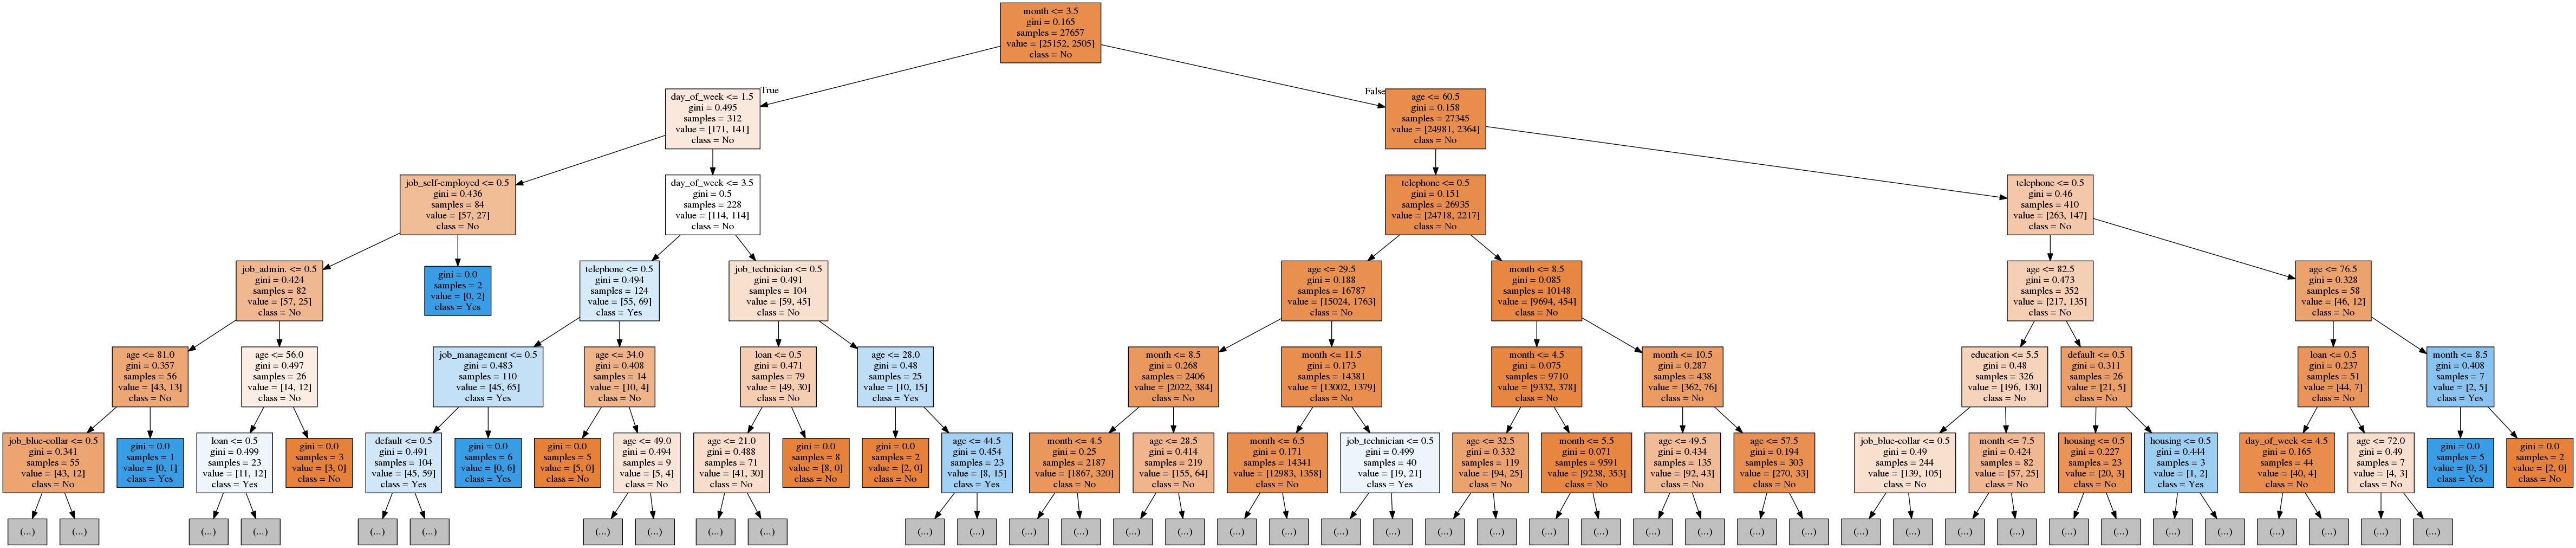

In [23]:
#Show Images 
Image("output/tree_gini.png")

### Short Detour: Information Gain & Entropy

**Example**:
Lets assume we have 2 classes and 80 objects. 50 objects are in class 1, 30 objects in class 2.


#### Entropy - Baseline (30,80):
E(total) = - 30/80\*log2(30/80) - 30/80\*log2(30/80) = 0.9544

#### Split results in (5,25) & (45,5):
E( left ) = - 5/30\*log2(5/30) - 25/30\*log2(25/30) = 0.6500

E(right) = - 5/50\*log2(5/50) - 45/50\*log2(45/50) = 0.4690

**IG** = E(total) - (0.6500 \* (30/80) + 0.4690 \* (50/80)) = **0.4175**

### Gini Impurity

#### GINI - Baseline (30,80):
G(base) = 1 - [ (50/80)^2 + (30/80)^2] = 0.46975

#### Split results in (5,25) & (45,5):
*G(left)* = 
1- [(5/30)^2 + (25/30)^2] = 0.2778

*G(right) = *
1- [(5/50)^2 + (45/50)^2] = 0.18

#### GINI - After Split:
**G(level 1)** = 0.2777 \* (30/80) + 0.18 \* (50/80) = **0.2163**


*GINI - used in CART algorithm - is slightly faster in computation than IG which is used in ID3.*

### 8. Random Forest 

In [24]:
from sklearn.ensemble import RandomForestClassifier

for c in criteria: 
    forest_clf = RandomForestClassifier(n_estimators=30, criterion=c, random_state=42)
    forest_clf.fit(X_final,y)
    y_pred = forest_clf.predict(X_test_prepared)
    print("{}".format(c), forest_clf.score(X_test_prepared, y_test))

gini 0.8870810283110967
entropy 0.8867556134070941


**Cool, we got 85% Score for the Decision Tree and even 88% for the Random Forest - that's great, or?**

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred_tree, y_test)
print("Decision Tree Confusion Matrix\n", cm)
print("Precision: {}".format(cm[1,1]/(cm[0,1]+cm[1,1])))
print("Recall: {}".format(cm[1,1]/(cm[1,0]+cm[1,1])))

Decision Tree Confusion Matrix
 [[7667  722]
 [ 664  166]]
Precision: 0.18693693693693694
Recall: 0.2


In [26]:
cm = confusion_matrix(y_pred, y_test)
print("Random Forest Confusion Matrix\n", cm)
print("Precision: {}".format(cm[1,1]/(cm[0,1]+cm[1,1])))
print("Recall: {}".format(cm[1,1]/(cm[1,0]+cm[1,1])))

Random Forest Confusion Matrix
 [[8089  802]
 [ 242   86]]
Precision: 0.09684684684684684
Recall: 0.2621951219512195


**Ups, no - that's actually pretty bad.**

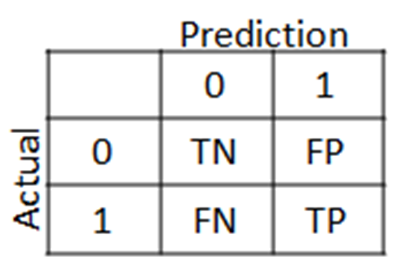

In [5]:
Image("data/conf.png", width=200)

**Precision (%)** : True Positives / All Predicted Positives </p>
**Recall (%)** :   True Positives / All Actual    Positives </p><br/>
<i>  --> Tradeoff! </i> (e.g. Terrorist Detection)

In [27]:
# Get numerical feature importances
importances = list(forest_clf.feature_importances_)
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(cols[0], importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True) 
feature_importances

[('age', 0.368),
 ('month', 0.168),
 ('day_of_week', 0.129),
 ('education', 0.093),
 ('housing', 0.047),
 ('loan', 0.032),
 ('telephone', 0.028),
 ('default', 0.016),
 ('job_admin.', 0.014),
 ('job_technician', 0.013),
 ('married', 0.012),
 ('job_blue-collar', 0.009),
 ('job_management', 0.009),
 ('divorced', 0.009),
 ('single', 0.009),
 ('job_services', 0.008),
 ('job_entrepreneur', 0.007),
 ('job_self-employed', 0.007),
 ('job_retired', 0.006),
 ('job_unemployed', 0.006),
 ('job_housemaid', 0.005),
 ('job_student', 0.005)]

**Aha - so what happens when I kick out these unimportant columns?**

In [28]:
#Slice X_final 
cols_shrinked = [f for f,v in feature_importances[:1]]
X_final_shrinked = X_final[cols_shrinked]
X_test_shrinked = X_test_prepared[cols_shrinked]
X_final_shrinked.head()

,age
0,48.0
1,50.0
2,42.0
3,32.0
4,37.0


In [29]:
for c in criteria: 
    forest_clf = RandomForestClassifier(n_estimators=30, criterion=c, random_state=42)
    forest_clf.fit(X_final_shrinked,y)
    y_pred = forest_clf.predict(X_test_shrinked)
    print("{}".format(c), forest_clf.score(X_test_shrinked, y_test))

gini 0.9030263586072242
entropy 0.9030263586072242


**Wohooo, over 90%!**

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred, y_test)
print(cm)
print("Precision: {}".format(cm[1,1]/(cm[0,1]+cm[1,1])))
print("Recall: {}".format(cm[1,1]/(cm[1,0]+cm[1,1])))

[[8318  881]
 [  13    7]]
Precision: 0.007882882882882882
Recall: 0.35


**... NOT.** 

### 9. Random Forest: Optimization?

In [31]:
#Slice X_final 
cols_shrinked = [f for f,v in feature_importances[:8]]
X_final_shrinked = X_final[cols_shrinked]
X_test_shrinked = X_test_prepared[cols_shrinked]
X_final_shrinked.head()

,age,month,day_of_week,education,housing,loan,telephone,default
0,48.0,7.0,1.0,4.0,0.0,1.0,1.0,0.0
1,50.0,7.0,2.0,4.0,0.0,0.0,0.0,0.0
2,42.0,5.0,3.0,6.0,0.0,0.0,1.0,0.0
3,32.0,5.0,5.0,3.0,0.0,0.0,1.0,0.0
4,37.0,5.0,2.0,4.0,1.0,1.0,1.0,1.0


In [32]:
for c in criteria: 
    forest_clf = RandomForestClassifier(n_estimators=30, criterion=c, random_state=42)
    forest_clf.fit(X_final_shrinked,y)
    y_pred = forest_clf.predict(X_test_shrinked)
    print("{}".format(c), forest_clf.score(X_test_shrinked, y_test))

gini 0.8839353509057382
entropy 0.8846946523484109


In [33]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred, y_test)
print(cm)
print("Precision: {}".format(cm[1,1]/(cm[0,1]+cm[1,1])))
print("Recall: {}".format(cm[1,1]/(cm[1,0]+cm[1,1])))

[[8047  779]
 [ 284  109]]
Precision: 0.12274774774774774
Recall: 0.27735368956743


**So, that's the maximum we can get?** 

Let's move to part 2.